In [158]:
import pylab
import numpy
from random import random, randint
from copy import deepcopy

In [159]:
lib = [{"type":"value"},{"type":"function","function":lambda a:a[0]+a[1]},{"type":"function","function":lambda a:a[0]-a[1]},{"type":"function","function":lambda a:a[0]*a[1]},{"type":"function","function":lambda a:a[0]/a[1]}]

#a*(b+c)
g1 = [{"lib_id":0,"input":[],"arg_index":0},{"lib_id":0,"input":[],"arg_index":1},{"lib_id":0,"input":[],"arg_index":2},{"lib_id":1,"input":[1,2]},{"lib_id":3,"input":[0,3]}]
#(a+b)**2
g2 = [{"lib_id":0,"input":[],"arg_index":1},{"lib_id":0,"input":[],"arg_index":0},{"lib_id":3,"input":[3,4]},{"lib_id":1,"input":[0,1]},{"lib_id":1,"input":[0,1]}]

In [171]:
def eval(graph,values,index=-1):
  if index == -1:
    index = find_output_node(graph)
  node = graph[index]
  lib_entry = lib[node["lib_id"]]
  node_type = lib_entry["type"]
  if node_type == "value":
    return values[node["arg_index"]]
  else:
    args = []
    for argument in node["input"]:
      arg = eval(graph,values,argument)
      args.append(arg)
    if node_type == "function":
        return lib_entry["function"](args)
    elif node_type == "graph":
        return eval(lib_entry["graph"](args),args)

def find_output_node(graph):
    referenced = []
    for node in graph:
      referenced += node["input"]
    for n, node in enumerate(graph):
      if n not in referenced:
        return n
    
def number_of_arguments(graph):
    n_arg = 0
    for n, node in enumerate(graph):
        lib_entry = lib[node["lib_id"]]
        node_type = lib_entry["type"]
        if node_type == "value":
            n_arg += 1
    return n_arg

def input_info(graph):
    args = []
    for n, node in enumerate(graph):
        lib_entry = lib[node["lib_id"]]
        node_type = lib_entry["type"]
        if node_type == "value":
            args.append([n,node["arg_index"]])
    n_args = len(args)
    arguments = [0 for i in range(n_args)]
    for arg in args:
        arguments[arg[1]] = arg[0]
    return arguments

def insert_at(donor_graph,recipient_graph,site=-1):
    recipient_args = input_info(recipient_graph)
    donor_args = input_info(donor_graph)
    if site == -1:
        site = randint(0,len(recipient_args)-1)
    site_index = recipient_args[site]
    site_arg_index = recipient_graph[site_index]["arg_index"]
    donor_output = find_output_node(donor_graph)
    new_graph = [deepcopy(node) for node in recipient_graph]
    new_graph.pop(site_index)
    for n, node in enumerate(new_graph):
        lib_entry = lib[node["lib_id"]]
        node_type = lib_entry["type"]
        if node_type == "function" or node_type == "graph":
            node_input = [ni for ni in node["input"]]
            for s, subnode in enumerate(node_input):
                if subnode > site_index:
                    node_input[s] = subnode - 1
                elif subnode == site_index:
                    node_input[s] = donor_output + len(new_graph)
            node["input"] = node_input
        elif node_type == "value":
            node["arg_index"] -= (1 if node["arg_index"] > site_arg_index else 0)
    processed_donor = [deepcopy(node) for node in donor_graph]
    for n, node in enumerate(processed_donor):
        lib_entry = lib[node["lib_id"]]
        node_type = lib_entry["type"]
        if node_type == "function" or node_type == "graph":
            node_input = [ni for ni in node["input"]]
            node["input"] = [ni + len(new_graph) for ni in node_input]
        elif node_type == "value":
            node["arg_index"] += len(recipient_args) - 1
    return new_graph+processed_donor

[{'lib_id': 0, 'input': [], 'arg_index': 0}, {'lib_id': 3, 'input': [2, 3]}, {'lib_id': 1, 'input': [8, 0]}, {'lib_id': 1, 'input': [8, 0]}, {'lib_id': 0, 'input': [], 'arg_index': 1}, {'lib_id': 0, 'input': [], 'arg_index': 2}, {'lib_id': 0, 'input': [], 'arg_index': 3}, {'lib_id': 1, 'input': [5, 6]}, {'lib_id': 3, 'input': [4, 7]}]


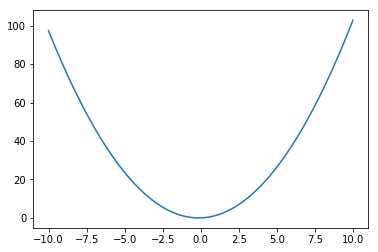

In [79]:
pylab.close()
x = numpy.linspace(-10,10,100)
values = [random() for n in range(number_of_arguments(g2))]
value_matrix = [[(xe if v == 0 else value) for v, value in enumerate(values)] for xe in x]
y = numpy.array([ eval(g2,value_matrix[i]) for i in range(len(value_matrix)) ])
pylab.plot(x,y)
pylab.show()

In [149]:
a={"aa":[1,2],"aaa":2}
b=a["aa"]
b[0]=5
a

{'aa': [5, 2], 'aaa': 2}

In [142]:
a0 a1 a2 a3 a4
a0 a1 a3 a4 b0 b1

TypeError: can only concatenate list (not "int") to list